In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (f1_score, precision_score, recall_score, accuracy_score,
                             roc_auc_score, confusion_matrix)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from xgboost import XGBClassifier


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Post_DC/P3/df.csv")
df.drop(columns=['Unnamed: 0'],inplace=True, axis=1)
df['coin']=df['coin'].str[:-4]
print(df.shape)
df.head()

(182855, 30)


,Date,Open,High,Low,Close,Adj Close,Volume,coin,Market_Cap,Pct_Change,...,Open_1m_std,Open_3m_std,Open_6m_std,Open_12m_std,Open_24m_std,Open_1m_volatility,Open_3m_volatility,Open_6m_volatility,Open_12m_volatility,Open_24m_volatility
0,2019-01-01,0.002876,0.002930,0.002784,0.002913,0.002913,331289.0,AAC,965.044878,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,0.002928,0.002953,0.002757,0.002872,0.002872,305086.0,AAC,876.206987,-1.407486,...,0.000037,0.000037,0.000037,0.000037,0.000037,NaN,NaN,NaN,NaN,NaN
2,2019-01-03,0.002869,0.003170,0.002736,0.002900,0.002900,317624.0,AAC,921.109588,0.974930,...,0.000032,0.000032,0.000032,0.000032,0.000032,0.027033,0.027033,0.027033,0.027033,0.027033
3,2019-01-04,0.002898,0.002986,0.002797,0.002901,0.002901,435891.0,AAC,1264.519778,0.034483,...,0.000027,0.000027,0.000027,0.000027,0.000027,0.020169,0.020169,0.020169,0.020169,0.020169
4,2019-01-05,0.002898,0.003046,0.002845,0.002907,0.002907,518812.0,AAC,1508.186493,0.206827,...,0.000023,0.000023,0.000023,0.000023,0.000023,0.016522,0.016522,0.016522,0.016522,0.016522


In [4]:
missing_rows = df[df.isna().any(axis=1)]
missing_rows[missing_rows['PD']==1]

,Date,Open,High,Low,Close,Adj Close,Volume,coin,Market_Cap,Pct_Change,...,Open_1m_std,Open_3m_std,Open_6m_std,Open_12m_std,Open_24m_std,Open_1m_volatility,Open_3m_volatility,Open_6m_volatility,Open_12m_volatility,Open_24m_volatility
7135,2019-01-01,0.071168,0.082055,0.068968,0.075914,0.075914,1200199.0,AMB,91111.910433,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.dropna()

In [6]:
df['PD'].value_counts()

,count
PD,
0.0,181832
1.0,560


In [7]:
pd_data = df[df['PD'] == 1]
#non_pd = df[df['PD'] == 0]
non_pd = df[df['PD'] == 0].sample(n=560)

df1 = pd.concat([pd_data, non_pd], axis=0)

print(df1.shape)
df1.head()

(1120, 30)


,Date,Open,High,Low,Close,Adj Close,Volume,coin,Market_Cap,Pct_Change,...,Open_1m_std,Open_3m_std,Open_6m_std,Open_12m_std,Open_24m_std,Open_1m_volatility,Open_3m_volatility,Open_6m_volatility,Open_12m_volatility,Open_24m_volatility
1048,2021-11-14,0.006620,0.016861,0.006129,0.008491,0.008491,3843984.0,AAC,32639.268761,27.838007,...,0.000929,0.002296,0.002095,0.004369,0.022013,0.276600,0.190982,0.172455,0.162004,0.545501
2033,2021-07-07,0.126935,0.130509,0.120951,0.121511,0.121511,5194855.0,ABT,631232.012474,-4.159796,...,0.013661,0.059478,0.053473,0.051806,0.051311,0.079807,0.078082,0.081115,0.081554,0.071299
3116,2021-06-05,0.031044,0.032280,0.030377,0.031070,0.031070,13619.0,ACM,423.142324,0.051524,...,0.005756,0.009343,0.014487,0.012283,0.022583,0.120749,0.117558,0.172330,0.134692,0.128778
3530,2019-07-05,0.127558,0.156418,0.126433,0.138604,0.138604,3654155.0,ADX,506480.500390,8.647666,...,0.014421,0.017238,0.026452,0.026558,0.026558,0.043378,0.045730,0.053179,0.052791,0.052791
3551,2019-07-26,0.149565,0.149565,0.120194,0.120429,0.120429,796779.0,ADX,95955.299584,-19.484798,...,0.017023,0.018406,0.024131,0.025997,0.025997,0.166977,0.102651,0.083132,0.079824,0.079824


In [8]:
df1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'coin',
       'Market_Cap', 'Pct_Change', 'Month_Year', 'PD', 'isPenny', 'drawdown',
       'drawdown_percentage', 'Open_1m_avg', 'Open_3m_avg', 'Open_6m_avg',
       'Open_12m_avg', 'Open_24m_avg', 'Open_1m_std', 'Open_3m_std',
       'Open_6m_std', 'Open_12m_std', 'Open_24m_std', 'Open_1m_volatility',
       'Open_3m_volatility', 'Open_6m_volatility', 'Open_12m_volatility',
       'Open_24m_volatility'],
      dtype='object')

In [9]:
df1['PD'].value_counts()

,count
PD,
1.0,560
0.0,560


In [10]:
X=df1[['Open', 'High', 'Low', 'Close', 'Volume',
       'Market_Cap', 'isPenny', 'drawdown',
       'drawdown_percentage', 'Open_1m_avg', 'Open_3m_avg', 'Open_6m_avg',
       'Open_12m_avg', 'Open_24m_avg', 'Open_1m_std', 'Open_3m_std',
       'Open_6m_std', 'Open_12m_std', 'Open_24m_std', 'Open_1m_volatility',
       'Open_3m_volatility', 'Open_6m_volatility', 'Open_12m_volatility',
       'Open_24m_volatility']]
#X=df1[['Open_1m_avg','drawdown','Open','Volume']]
y=df1['PD']

# OC-SVM

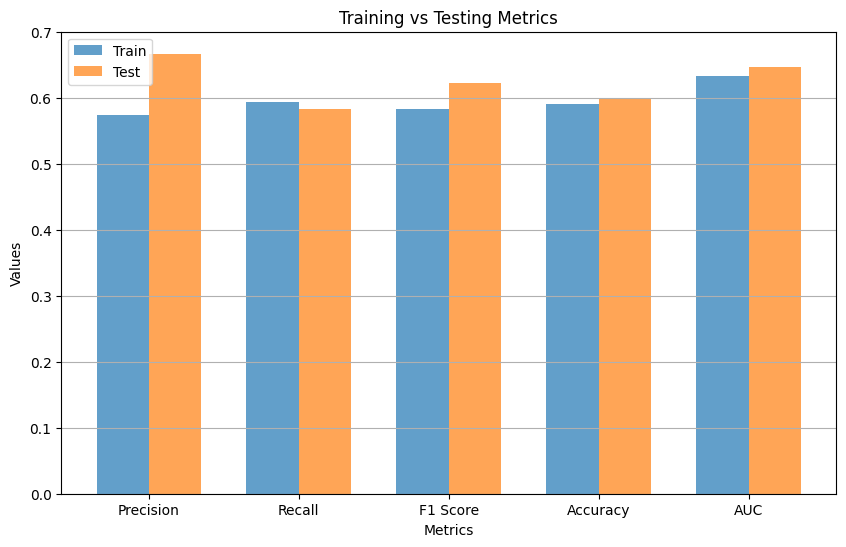

Best Hyperparameters:
{'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.5}


,Model,Set,Precision,Recall,F1 Score,Accuracy,AUC
0,One-Class SVM (OCSVM),Train,0.573661,0.593533,0.583428,0.590402,0.632645
1,One-Class SVM (OCSVM),Test,0.666667,0.582677,0.621849,0.598214,0.645994


In [11]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'nu': [0.5]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.apply(np.log1p)
X_test = X_test.apply(np.log1p)

ocsvm = OneClassSVM()
grid_search = GridSearchCV(
    estimator=ocsvm,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

best_params = grid_search.best_params_

y_train_pred = best_model.predict(X_train)
y_train_pred = np.where(y_train_pred == 1, 1, 0)
y_train_prob = best_model.decision_function(X_train)

train_metrics = {
    'Precision': precision_score(y_train, y_train_pred),
    'Recall': recall_score(y_train, y_train_pred),
    'F1 Score': f1_score(y_train, y_train_pred),
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'AUC': roc_auc_score(y_train, y_train_prob)
}

y_test_pred = best_model.predict(X_test)
y_test_pred = np.where(y_test_pred == 1, 1, 0)
y_test_prob = best_model.decision_function(X_test)

test_metrics = {
    'Precision': precision_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'F1 Score': f1_score(y_test, y_test_pred),
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'AUC': roc_auc_score(y_test, y_test_prob)
}

final_output = pd.DataFrame({
    "Model": ["One-Class SVM (OCSVM)", "One-Class SVM (OCSVM)"],
    "Set": ["Train", "Test"],
    "Precision": [train_metrics["Precision"], test_metrics["Precision"]],
    "Recall": [train_metrics["Recall"], test_metrics["Recall"]],
    "F1 Score": [train_metrics["F1 Score"], test_metrics["F1 Score"]],
    "Accuracy": [train_metrics["Accuracy"], test_metrics["Accuracy"]],
    "AUC": [train_metrics["AUC"], test_metrics["AUC"]]
})


plt.figure(figsize=(10, 6))
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy', 'AUC']
train_values = [train_metrics[metric] for metric in metrics]
test_values = [test_metrics[metric] for metric in metrics]

bar_width = 0.35
index = np.arange(len(metrics))

plt.bar(index, train_values, bar_width, label='Train', alpha=0.7)
plt.bar(index + bar_width, test_values, bar_width, label='Test', alpha=0.7)

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Training vs Testing Metrics')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()
plt.grid(axis='y')
plt.show()

print("Best Hyperparameters:")
print(best_params)

final_output

# KNN

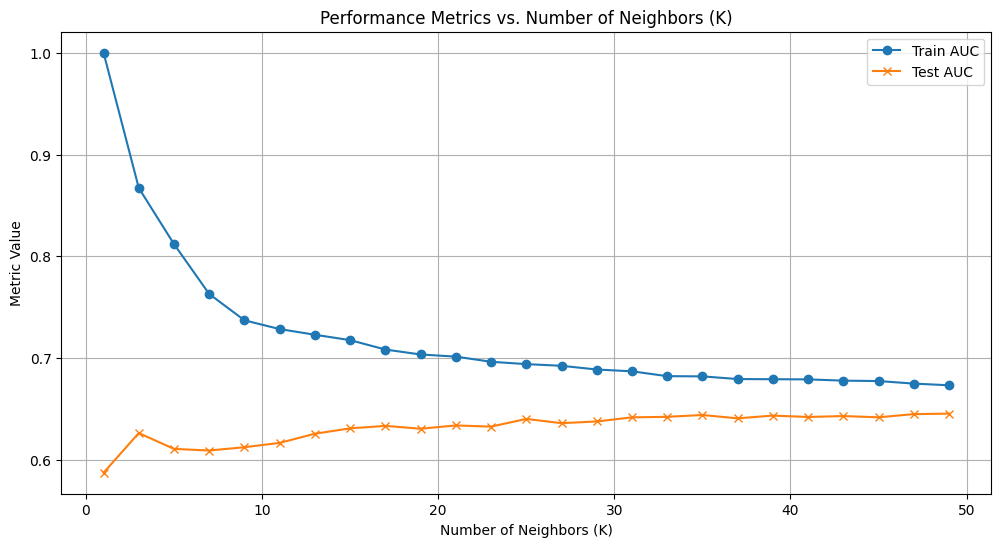

Best K :  49


,Model,Set,Precision,Recall,F1 Score,Accuracy,AUC
0,One-Class SVM (OCSVM),Train,0.573661,0.593533,0.583428,0.590402,0.632645
1,One-Class SVM (OCSVM),Test,0.666667,0.582677,0.621849,0.598214,0.645994
0,KNN,Train,0.609329,0.711161,0.656055,0.627679,0.673387
1,KNN,Test,0.594115,0.696429,0.640850,0.609821,0.645528


In [12]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

k_values = list(range(1, 50, 2))

k_metrics = []

best_k = None
best_auc = -1
final_train_metrics = {}
final_test_metrics = {}

for k in k_values:
    train_metrics_list = []
    test_metrics_list = []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        X_train = X_train.apply(np.log1p)
        X_test = X_test.apply(np.log1p)

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        y_train_pred = knn.predict(X_train)
        y_train_pred = np.where(y_train_pred == 1, 1, 0)
        y_train_prob = knn.predict_proba(X_train)[:, 1]

        train_metrics_list.append({
            'Precision': precision_score(y_train, y_train_pred),
            'Recall': recall_score(y_train, y_train_pred),
            'F1 Score': f1_score(y_train, y_train_pred),
            'Accuracy': accuracy_score(y_train, y_train_pred),
            'AUC': roc_auc_score(y_train, y_train_prob)
        })

        y_test_pred = knn.predict(X_test)
        y_test_pred = np.where(y_test_pred == 1, 1, 0)
        y_test_prob = knn.predict_proba(X_test)[:, 1]

        test_metrics_list.append({
            'Precision': precision_score(y_test, y_test_pred),
            'Recall': recall_score(y_test, y_test_pred),
            'F1 Score': f1_score(y_test, y_test_pred),
            'Accuracy': accuracy_score(y_test, y_test_pred),
            'AUC': roc_auc_score(y_test, y_test_prob)
        })

    train_metrics_df = pd.DataFrame(train_metrics_list)
    test_metrics_df = pd.DataFrame(test_metrics_list)

    avg_train_metrics = train_metrics_df.mean()
    avg_test_metrics = test_metrics_df.mean()

    if avg_test_metrics['AUC'] > best_auc:
        best_auc = avg_test_metrics['AUC']
        best_k = k
        final_train_metrics = avg_train_metrics
        final_test_metrics = avg_test_metrics

    k_metrics.append({
        'K': k,
        'Train Precision': avg_train_metrics['Precision'],
        'Train Recall': avg_train_metrics['Recall'],
        'Train F1 Score': avg_train_metrics['F1 Score'],
        'Train Accuracy': avg_train_metrics['Accuracy'],
        'Train AUC': avg_train_metrics['AUC'],
        'Test Precision': avg_test_metrics['Precision'],
        'Test Recall': avg_test_metrics['Recall'],
        'Test F1 Score': avg_test_metrics['F1 Score'],
        'Test Accuracy': avg_test_metrics['Accuracy'],
        'Test AUC': avg_test_metrics['AUC']
    })

k_metrics_df = pd.DataFrame(k_metrics)

metrics = pd.DataFrame([
    {
        'Model': 'KNN',
        'Set': 'Train',
        'Precision': final_train_metrics['Precision'],
        'Recall': final_train_metrics['Recall'],
        'F1 Score': final_train_metrics['F1 Score'],
        'Accuracy': final_train_metrics['Accuracy'],
        'AUC': final_train_metrics['AUC']
    },
    {
        'Model': 'KNN',
        'Set': 'Test',
        'Precision': final_test_metrics['Precision'],
        'Recall': final_test_metrics['Recall'],
        'F1 Score': final_test_metrics['F1 Score'],
        'Accuracy': final_test_metrics['Accuracy'],
        'AUC': final_test_metrics['AUC']
    }
])


final_output=pd.concat([final_output,metrics],axis=0)
plt.figure(figsize=(12, 6))

# Plot Train Metrics
# plt.plot(k_metrics_df['K'], k_metrics_df['Train Precision'], label='Train Precision', marker='o')
# plt.plot(k_metrics_df['K'], k_metrics_df['Train Recall'], label='Train Recall', marker='o')
# plt.plot(k_metrics_df['K'], k_metrics_df['Train F1 Score'], label='Train F1 Score', marker='o')
# plt.plot(k_metrics_df['K'], k_metrics_df['Train Accuracy'], label='Train Accuracy', marker='o')
plt.plot(k_metrics_df['K'], k_metrics_df['Train AUC'], label='Train AUC', marker='o')

# Plot Test Metrics
# plt.plot(k_metrics_df['K'], k_metrics_df['Test Precision'], label='Test Precision', marker='x')
# plt.plot(k_metrics_df['K'], k_metrics_df['Test Recall'], label='Test Recall', marker='x')
# plt.plot(k_metrics_df['K'], k_metrics_df['Test F1 Score'], label='Test F1 Score', marker='x')
# plt.plot(k_metrics_df['K'], k_metrics_df['Test Accuracy'], label='Test Accuracy', marker='x')
plt.plot(k_metrics_df['K'], k_metrics_df['Test AUC'], label='Test AUC', marker='x')

plt.title('Performance Metrics vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)

plt.show()

print("Best K : ",best_k)
final_output

# Random Forest

In [13]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_metrics_list = []
test_metrics_list = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    X_train = X_train.apply(np.log1p)
    X_test = X_test.apply(np.log1p)

    rf = RandomForestClassifier(n_estimators=500, max_depth=3,min_samples_split=7,min_samples_leaf=5,
                                random_state=42,
                                class_weight='balanced'
                                )

    rf.fit(X_train, y_train)
    print("Fold : ", fold)
    print("Parameters: ", rf.get_params())

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    train_metrics = {
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1 Score': f1_score(y_train, y_train_pred),
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'AUC': roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1])
    }
    train_metrics_list.append(train_metrics)

    test_metrics = {
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred),
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'AUC': roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
    }
    test_metrics_list.append(test_metrics)

train_metrics_df = pd.DataFrame(train_metrics_list)
test_metrics_df = pd.DataFrame(test_metrics_list)

avg_train_metrics = train_metrics_df.mean()
avg_test_metrics = test_metrics_df.mean()

train_final = pd.DataFrame({
    "Model": ["Random Forest (RF)"],
    "Set": ["Train"],
    "Precision": [avg_train_metrics["Precision"]],
    "Recall": [avg_train_metrics["Recall"]],
    "F1 Score": [avg_train_metrics["F1 Score"]],
    "Accuracy": [avg_train_metrics["Accuracy"]],
    "AUC": [avg_train_metrics["AUC"]]
})

test_final = pd.DataFrame({
    "Model": ["Random Forest (RF)"],
    "Set": ["Test"],
    "Precision": [avg_test_metrics["Precision"]],
    "Recall": [avg_test_metrics["Recall"]],
    "F1 Score": [avg_test_metrics["F1 Score"]],
    "Accuracy": [avg_test_metrics["Accuracy"]],
    "AUC": [avg_test_metrics["AUC"]]
})

final_output = pd.concat([final_output, train_final, test_final], axis=0)

final_output


Fold :  0
Parameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Fold :  1
Parameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Fold :  2
Parameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth

,Model,Set,Precision,Recall,F1 Score,Accuracy,AUC
0,One-Class SVM (OCSVM),Train,0.573661,0.593533,0.583428,0.590402,0.632645
1,One-Class SVM (OCSVM),Test,0.666667,0.582677,0.621849,0.598214,0.645994
0,KNN,Train,0.609329,0.711161,0.656055,0.627679,0.673387
1,KNN,Test,0.594115,0.696429,0.640850,0.609821,0.645528
0,Random Forest (RF),Train,0.674606,0.706250,0.689626,0.682366,0.759416
0,Random Forest (RF),Test,0.618468,0.632143,0.623390,0.621429,0.683913



Top 10 Features by Importance:
Open_12m_volatility: 0.1183
Open_24m_volatility: 0.1125
Volume: 0.1082
Market_Cap: 0.1060
Open_6m_volatility: 0.0732
Open_3m_volatility: 0.0431
Open_1m_volatility: 0.0410
Open_12m_std: 0.0397
Open_6m_std: 0.0354
drawdown: 0.0297


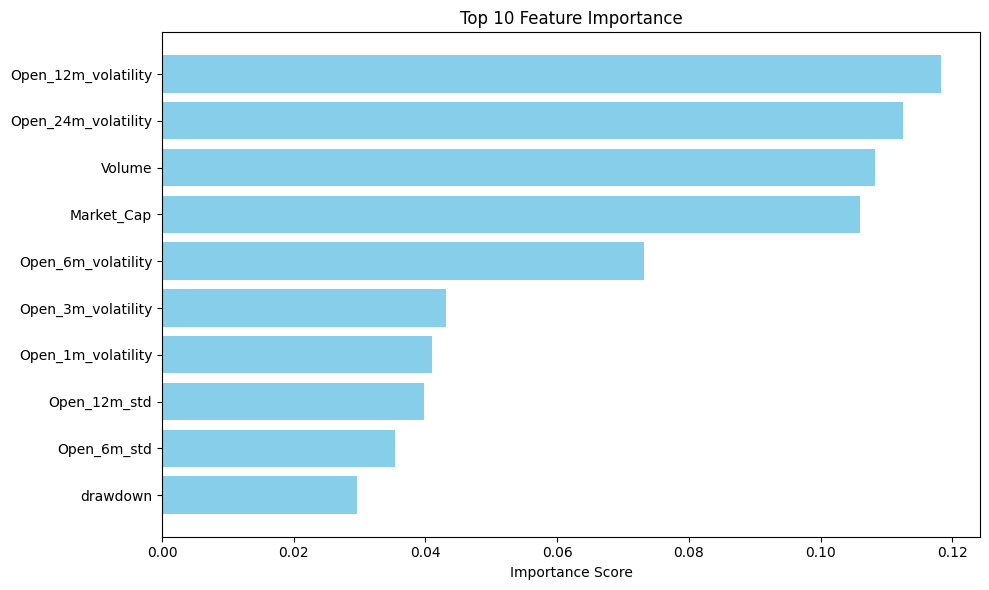

In [14]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

top_n = 10
top_indices = indices[:top_n]

print("\nTop 10 Features by Importance:")
for i in range(top_n):
    print(f"{X_train.columns[top_indices[i]]}: {importances[top_indices[i]]:.4f}")

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importance")
plt.barh(range(top_n), importances[top_indices], color='skyblue', align="center")
plt.yticks(range(top_n), X_train.columns[top_indices])
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [15]:
rf_full = RandomForestClassifier(n_estimators=500, max_depth=3,min_samples_split=7,min_samples_leaf=5,
                                random_state=42,
                                class_weight='balanced'
                                )
rf_full.fit(X.apply(np.log1p), y)

feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_full.feature_importances_
}).sort_values(by="Importance", ascending=False)

top_10_features = feature_importances.head(10)["Feature"].tolist()
print("Top 10 Features:", top_10_features)

X_top_10 = X[top_10_features]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_metrics_list = []
test_metrics_list = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X_top_10, y)):
    X_train, X_test = X_top_10.iloc[train_idx], X_top_10.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    X_train = X_train.apply(np.log1p)
    X_test = X_test.apply(np.log1p)

    rf = RandomForestClassifier(n_estimators=500, max_depth=3,min_samples_split=7,min_samples_leaf=5,
                                random_state=42,
                                class_weight='balanced'
                                )
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    train_metrics = {
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1 Score': f1_score(y_train, y_train_pred),
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'AUC': roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1])
    }
    train_metrics_list.append(train_metrics)

    y_test_pred = rf.predict(X_test)
    test_metrics = {
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred),
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'AUC': roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
    }
    test_metrics_list.append(test_metrics)

train_metrics_df = pd.DataFrame(train_metrics_list).mean()
test_metrics_df = pd.DataFrame(test_metrics_list).mean()

train_final = pd.DataFrame({
    "Model": ["Random Forest (Top 10 Features)"],
    "Set": ["Train"],
    "Precision": [train_metrics_df["Precision"]],
    "Recall": [train_metrics_df["Recall"]],
    "F1 Score": [train_metrics_df["F1 Score"]],
    "Accuracy": [train_metrics_df["Accuracy"]],
    "AUC": [train_metrics_df["AUC"]]
})

test_final = pd.DataFrame({
    "Model": ["Random Forest (Top 10 Features)"],
    "Set": ["Test"],
    "Precision": [test_metrics_df["Precision"]],
    "Recall": [test_metrics_df["Recall"]],
    "F1 Score": [test_metrics_df["F1 Score"]],
    "Accuracy": [test_metrics_df["Accuracy"]],
    "AUC": [test_metrics_df["AUC"]]
})

metrics = pd.concat([train_final, test_final], axis=0)
final_output = pd.concat([final_output, metrics], axis=0)

final_output


Top 10 Features: ['Volume', 'Market_Cap', 'Open_24m_volatility', 'Open_12m_volatility', 'Open_6m_volatility', 'Open_12m_std', 'Open_3m_volatility', 'Open_1m_volatility', 'Open_6m_std', 'Open_24m_std']


,Model,Set,Precision,Recall,F1 Score,Accuracy,AUC
0,One-Class SVM (OCSVM),Train,0.573661,0.593533,0.583428,0.590402,0.632645
1,One-Class SVM (OCSVM),Test,0.666667,0.582677,0.621849,0.598214,0.645994
0,KNN,Train,0.609329,0.711161,0.656055,0.627679,0.673387
1,KNN,Test,0.594115,0.696429,0.640850,0.609821,0.645528
0,Random Forest (RF),Train,0.674606,0.706250,0.689626,0.682366,0.759416
0,Random Forest (RF),Test,0.618468,0.632143,0.623390,0.621429,0.683913
0,Random Forest (Top 10 Features),Train,0.685217,0.686607,0.685609,0.685491,0.754308
0,Random Forest (Top 10 Features),Test,0.626295,0.630357,0.626346,0.628571,0.686193


# XG Boost

In [16]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_metrics_list = []
test_metrics_list = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    X_train = X_train.apply(np.log1p)
    X_test = X_test.apply(np.log1p)

    #xgb = XGBClassifier(n_estimators=500, max_depth=3, learning_rate=0.001, min_child_weight=10, subsample=0.8, colsample_bytree=0.8, random_state=42,eval_metric='logloss')
    xgb = XGBClassifier(n_estimators=500, max_depth=3, learning_rate=0.001, min_child_weight=3, subsample=0.3, colsample_bytree=0.3, random_state=42,eval_metric='auc')

    xgb.fit(X_train, y_train)

    y_train_pred = xgb.predict(X_train)
    y_test_pred = xgb.predict(X_test)

    train_metrics = {
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1 Score': f1_score(y_train, y_train_pred),
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'AUC': roc_auc_score(y_train, xgb.predict_proba(X_train)[:, 1])
    }
    train_metrics_list.append(train_metrics)

    test_metrics = {
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred),
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'AUC': roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])
    }
    test_metrics_list.append(test_metrics)

train_metrics_df = pd.DataFrame(train_metrics_list)
test_metrics_df = pd.DataFrame(test_metrics_list)

avg_train_metrics = train_metrics_df.mean()
avg_test_metrics = test_metrics_df.mean()

train_final = pd.DataFrame({
    "Model": ["XGBoost (XGB)"],
    "Set": ["Train"],
    "Precision": [avg_train_metrics["Precision"]],
    "Recall": [avg_train_metrics["Recall"]],
    "F1 Score": [avg_train_metrics["F1 Score"]],
    "Accuracy": [avg_train_metrics["Accuracy"]],
    "AUC": [avg_train_metrics["AUC"]]
})

test_final = pd.DataFrame({
    "Model": ["XGBoost (XGB)"],
    "Set": ["Test"],
    "Precision": [avg_test_metrics["Precision"]],
    "Recall": [avg_test_metrics["Recall"]],
    "F1 Score": [avg_test_metrics["F1 Score"]],
    "Accuracy": [avg_test_metrics["Accuracy"]],
    "AUC": [avg_test_metrics["AUC"]]
})

metrics = pd.concat([train_final, test_final], axis=0)
final_output = pd.concat([final_output, metrics], axis=0)

final_output


,Model,Set,Precision,Recall,F1 Score,Accuracy,AUC
0,One-Class SVM (OCSVM),Train,0.573661,0.593533,0.583428,0.590402,0.632645
1,One-Class SVM (OCSVM),Test,0.666667,0.582677,0.621849,0.598214,0.645994
0,KNN,Train,0.609329,0.711161,0.656055,0.627679,0.673387
1,KNN,Test,0.594115,0.696429,0.640850,0.609821,0.645528
0,Random Forest (RF),Train,0.674606,0.706250,0.689626,0.682366,0.759416
0,Random Forest (RF),Test,0.618468,0.632143,0.623390,0.621429,0.683913
0,Random Forest (Top 10 Features),Train,0.685217,0.686607,0.685609,0.685491,0.754308
0,Random Forest (Top 10 Features),Test,0.626295,0.630357,0.626346,0.628571,0.686193
0,XGBoost (XGB),Train,0.676565,0.716071,0.695491,0.686607,0.760666
0,XGBoost (XGB),Test,0.620777,0.651786,0.634983,0.626786,0.680357



Top 10 Features by Importance:
Open_12m_volatility: 0.0750
Open_24m_volatility: 0.0670
Market_Cap: 0.0593
Volume: 0.0563
Open_6m_volatility: 0.0487
Open_3m_volatility: 0.0444
Open_3m_avg: 0.0404
Open_12m_std: 0.0404
Open_6m_std: 0.0389
Open_6m_avg: 0.0389


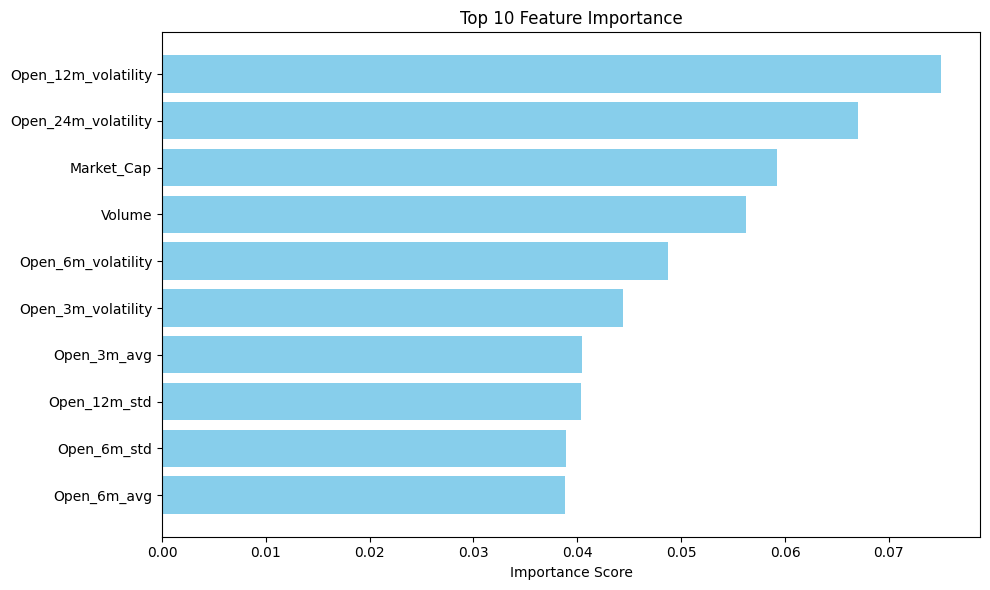

In [17]:
importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]

top_n = 10
top_indices = indices[:top_n]

print("\nTop 10 Features by Importance:")
for i in range(top_n):
    print(f"{X_train.columns[top_indices[i]]}: {importances[top_indices[i]]:.4f}")

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importance")
plt.barh(range(top_n), importances[top_indices], color='skyblue', align="center")
plt.yticks(range(top_n), X_train.columns[top_indices])
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [18]:
xgb_full = XGBClassifier(n_estimators=500, max_depth=3, learning_rate=0.001, min_child_weight=3, subsample=0.3, colsample_bytree=0.3, random_state=42,eval_metric='auc')

xgb_full.fit(X.apply(np.log1p), y)

feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb_full.feature_importances_
}).sort_values(by="Importance", ascending=False)

top_10_features = feature_importances.head(10)["Feature"].tolist()
print("Top 10 Features:", top_10_features)

X_top_10 = X[top_10_features]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_metrics_list = []
test_metrics_list = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X_top_10, y)):
    X_train, X_test = X_top_10.iloc[train_idx], X_top_10.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    X_train = X_train.apply(np.log1p)
    X_test = X_test.apply(np.log1p)

    xgb = XGBClassifier(n_estimators=500, max_depth=3, learning_rate=0.001, min_child_weight=3, subsample=0.3, colsample_bytree=0.3, random_state=42,eval_metric='auc')

    xgb.fit(X_train, y_train)

    y_train_pred = xgb.predict(X_train)
    train_metrics = {
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1 Score': f1_score(y_train, y_train_pred),
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'AUC': roc_auc_score(y_train, xgb.predict_proba(X_train)[:, 1])
    }
    train_metrics_list.append(train_metrics)

    y_test_pred = xgb.predict(X_test)
    test_metrics = {
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred),
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'AUC': roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])
    }
    test_metrics_list.append(test_metrics)

train_metrics_df = pd.DataFrame(train_metrics_list).mean()
test_metrics_df = pd.DataFrame(test_metrics_list).mean()

train_final = pd.DataFrame({
    "Model": ["XGBoost (Top 10 Features)"],
    "Set": ["Train"],
    "Precision": [train_metrics_df["Precision"]],
    "Recall": [train_metrics_df["Recall"]],
    "F1 Score": [train_metrics_df["F1 Score"]],
    "Accuracy": [train_metrics_df["Accuracy"]],
    "AUC": [train_metrics_df["AUC"]]
})

test_final = pd.DataFrame({
    "Model": ["XGBoost (Top 10 Features)"],
    "Set": ["Test"],
    "Precision": [test_metrics_df["Precision"]],
    "Recall": [test_metrics_df["Recall"]],
    "F1 Score": [test_metrics_df["F1 Score"]],
    "Accuracy": [test_metrics_df["Accuracy"]],
    "AUC": [test_metrics_df["AUC"]]
})

metrics = pd.concat([train_final, test_final], axis=0)
final_output = pd.concat([final_output, metrics], axis=0)

final_output


Top 10 Features: ['Open_24m_volatility', 'Open_12m_volatility', 'Volume', 'Market_Cap', 'isPenny', 'Open_6m_volatility', 'Open_1m_std', 'Open_3m_volatility', 'Open_6m_std', 'Open_6m_avg']


,Model,Set,Precision,Recall,F1 Score,Accuracy,AUC
0,One-Class SVM (OCSVM),Train,0.573661,0.593533,0.583428,0.590402,0.632645
1,One-Class SVM (OCSVM),Test,0.666667,0.582677,0.621849,0.598214,0.645994
0,KNN,Train,0.609329,0.711161,0.656055,0.627679,0.673387
1,KNN,Test,0.594115,0.696429,0.640850,0.609821,0.645528
0,Random Forest (RF),Train,0.674606,0.706250,0.689626,0.682366,0.759416
0,Random Forest (RF),Test,0.618468,0.632143,0.623390,0.621429,0.683913
0,Random Forest (Top 10 Features),Train,0.685217,0.686607,0.685609,0.685491,0.754308
0,Random Forest (Top 10 Features),Test,0.626295,0.630357,0.626346,0.628571,0.686193
0,XGBoost (XGB),Train,0.676565,0.716071,0.695491,0.686607,0.760666
0,XGBoost (XGB),Test,0.620777,0.651786,0.634983,0.626786,0.680357


# ANN

In [19]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_metrics_list = []
test_metrics_list = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    X_train = X_train.apply(np.log1p)
    X_test = X_test.apply(np.log1p)

    mlp = MLPClassifier(hidden_layer_sizes=(32,64,32,), activation='tanh', solver='adam',
                        alpha=0.0001, max_iter=300, random_state=42)
    mlp.fit(X_train, y_train)

    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)

    train_metrics = {
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1 Score': f1_score(y_train, y_train_pred),
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'AUC': roc_auc_score(y_train, mlp.predict_proba(X_train)[:, 1])
    }
    train_metrics_list.append(train_metrics)

    test_metrics = {
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred),
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'AUC': roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1])
    }
    test_metrics_list.append(test_metrics)

train_metrics_df = pd.DataFrame(train_metrics_list)
test_metrics_df = pd.DataFrame(test_metrics_list)

avg_train_metrics = train_metrics_df.mean()
avg_test_metrics = test_metrics_df.mean()

train_final = pd.DataFrame({
    "Model": ["MLP (Neural Network)"],
    "Set": ["Train"],
    "Precision": [avg_train_metrics["Precision"]],
    "Recall": [avg_train_metrics["Recall"]],
    "F1 Score": [avg_train_metrics["F1 Score"]],
    "Accuracy": [avg_train_metrics["Accuracy"]],
    "AUC": [avg_train_metrics["AUC"]]
})

test_final = pd.DataFrame({
    "Model": ["MLP (Neural Network)"],
    "Set": ["Test"],
    "Precision": [avg_test_metrics["Precision"]],
    "Recall": [avg_test_metrics["Recall"]],
    "F1 Score": [avg_test_metrics["F1 Score"]],
    "Accuracy": [avg_test_metrics["Accuracy"]],
    "AUC": [avg_test_metrics["AUC"]]
})

metrics = pd.concat([train_final, test_final], axis=0)
final_output = pd.concat([final_output, metrics], axis=0)

final_output


,Model,Set,Precision,Recall,F1 Score,Accuracy,AUC
0,One-Class SVM (OCSVM),Train,0.573661,0.593533,0.583428,0.590402,0.632645
1,One-Class SVM (OCSVM),Test,0.666667,0.582677,0.621849,0.598214,0.645994
0,KNN,Train,0.609329,0.711161,0.656055,0.627679,0.673387
1,KNN,Test,0.594115,0.696429,0.640850,0.609821,0.645528
0,Random Forest (RF),Train,0.674606,0.706250,0.689626,0.682366,0.759416
0,Random Forest (RF),Test,0.618468,0.632143,0.623390,0.621429,0.683913
0,Random Forest (Top 10 Features),Train,0.685217,0.686607,0.685609,0.685491,0.754308
0,Random Forest (Top 10 Features),Test,0.626295,0.630357,0.626346,0.628571,0.686193
0,XGBoost (XGB),Train,0.676565,0.716071,0.695491,0.686607,0.760666
0,XGBoost (XGB),Test,0.620777,0.651786,0.634983,0.626786,0.680357


# Ensemble Model

In [20]:
rf_model = rf_full
xgb_model = xgb_full
knn_model = knn
mlp_model = mlp

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_metrics_list = []
test_metrics_list = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    X_train = X_train.apply(np.log1p)
    X_test = X_test.apply(np.log1p)

    rf_model.fit(X_train, y_train)
    xgb_model.fit(X_train, y_train)
    knn_model.fit(X_train, y_train)
    mlp_model.fit(X_train, y_train)

    voting_model = VotingClassifier(estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('knn', knn_model),
        ('mlp', mlp_model)
    ], voting='soft')

    voting_model.fit(X_train, y_train)

    y_train_pred_voting = voting_model.predict(X_train)
    y_train_prob = voting_model.predict_proba(X_train)[:, 1]

    y_test_pred_voting = voting_model.predict(X_test)
    y_test_prob = voting_model.predict_proba(X_test)[:, 1]

    train_metrics_list.append({
        'Precision': precision_score(y_train, y_train_pred_voting),
        'Recall': recall_score(y_train, y_train_pred_voting),
        'F1 Score': f1_score(y_train, y_train_pred_voting),
        'Accuracy': accuracy_score(y_train, y_train_pred_voting),
        'AUC': roc_auc_score(y_train, y_train_prob)
    })

    test_metrics_list.append({
        'Precision': precision_score(y_test, y_test_pred_voting),
        'Recall': recall_score(y_test, y_test_pred_voting),
        'F1 Score': f1_score(y_test, y_test_pred_voting),
        'Accuracy': accuracy_score(y_test, y_test_pred_voting),
        'AUC': roc_auc_score(y_test, y_test_prob)
    })

train_metrics_df = pd.DataFrame(train_metrics_list)
test_metrics_df = pd.DataFrame(test_metrics_list)

avg_train_metrics = train_metrics_df.mean()
avg_test_metrics = test_metrics_df.mean()

train_final = pd.DataFrame({
    "Model": ["Ensemble Model (RF + XGB + KNN + MLP)"],
    "Set": ["Train"],
    "Precision": [avg_train_metrics["Precision"]],
    "Recall": [avg_train_metrics["Recall"]],
    "F1 Score": [avg_train_metrics["F1 Score"]],
    "Accuracy": [avg_train_metrics["Accuracy"]],
    "AUC": [avg_train_metrics["AUC"]]
})

test_final = pd.DataFrame({
    "Model": ["Ensemble Model (RF + XGB + KNN + MLP)"],
    "Set": ["Test"],
    "Precision": [avg_test_metrics["Precision"]],
    "Recall": [avg_test_metrics["Recall"]],
    "F1 Score": [avg_test_metrics["F1 Score"]],
    "Accuracy": [avg_test_metrics["Accuracy"]],
    "AUC": [avg_test_metrics["AUC"]]
})

metrics = pd.concat([train_final, test_final], axis=0)

final_output = pd.concat([final_output, metrics], axis=0)

final_output


,Model,Set,Precision,Recall,F1 Score,Accuracy,AUC
0,One-Class SVM (OCSVM),Train,0.573661,0.593533,0.583428,0.590402,0.632645
1,One-Class SVM (OCSVM),Test,0.666667,0.582677,0.621849,0.598214,0.645994
0,KNN,Train,0.609329,0.711161,0.656055,0.627679,0.673387
1,KNN,Test,0.594115,0.696429,0.640850,0.609821,0.645528
0,Random Forest (RF),Train,0.674606,0.706250,0.689626,0.682366,0.759416
0,Random Forest (RF),Test,0.618468,0.632143,0.623390,0.621429,0.683913
0,Random Forest (Top 10 Features),Train,0.685217,0.686607,0.685609,0.685491,0.754308
0,Random Forest (Top 10 Features),Test,0.626295,0.630357,0.626346,0.628571,0.686193
0,XGBoost (XGB),Train,0.676565,0.716071,0.695491,0.686607,0.760666
0,XGBoost (XGB),Test,0.620777,0.651786,0.634983,0.626786,0.680357


In [21]:
#final_output.to_csv("/content/drive/MyDrive/Post_DC/P3/random_results.csv")